In [1]:
import numpy as np
from scipy import integrate, linalg, optimize
from matplotlib import pyplot as plt 


def fdt_real(omega, t):
    omega = np.array([omega], dtype=np.float128)
    t = np.array([t], dtype=np.float128)
    if ((omega[0] - chemical_potential) / T) <= 50:
        fun = np.exp(1.j * omega[0] * t[0]) \
              * (0.5 * sys_bath_coupling * (band_width**2)) / ((omega[0] + band_center)**2 + band_width**2)\
              / (1.0 + np.exp( (omega[0] - chemical_potential) / T ))
    elif ((omega[0] - chemical_potential) / T) > 50:
        fun = np.exp(1.j * omega[0] * t[0]) \
              * (0.5 * sys_bath_coupling * (band_width**2)) / ((omega[0] + band_center)**2 + band_width**2)\
              / 10e+22
    #print('C(w,t)',omega,t,fun)
    return fun.real

def fdt_imag(omega, t):
    omega = np.array([omega], dtype=np.float128)
    t = np.array([t], dtype=np.float128)
    if ((omega[0] - chemical_potential) / T) <= 50:
        fun = np.exp(1.j * omega[0] * t[0]) \
              * (0.5 * sys_bath_coupling * (band_width**2)) / ((omega[0] + band_center)**2 + band_width**2)\
              / (1.0 + np.exp( (omega[0] - chemical_potential) / T ))
    elif ((omega[0] - chemical_potential) / T) > 50:
        fun = np.exp(1.j * omega[0] * t[0]) \
              * (0.5 * sys_bath_coupling * (band_width**2)) / ((omega[0] + band_center)**2 + band_width**2)\
              / 10e+22
    #print('C(w,t)',omega,t,fun)
    return fun.imag

def Jfermi_exact_real(omega):
    omega = np.array([omega], dtype=np.float128)
    if ((omega[0] - chemical_potential) / T) <= 50:
        fun = 1.0 * (0.5 * sys_bath_coupling * (band_width**2)) / ((omega[0] + band_center)**2 + band_width**2)\
              / (1.0 + np.exp( (omega[0] - chemical_potential) / T ))
    elif ((omega[0] - chemical_potential) / T) > 50:
        fun = 1.0 * (0.5 * sys_bath_coupling * (band_width**2)) / ((omega[0] + band_center)**2 + band_width**2)\
              / 10e+22
    #print('C(w,t)',omega,t,fun)
    return fun.real

def Jfermi_exact_imag(omega):
    omega = np.array([omega], dtype=np.float128)
    if ((omega[0] - chemical_potential) / T) <= 50:
        fun = 1.0 * (0.5 * sys_bath_coupling * (band_width**2)) / ((omega[0] + band_center)**2 + band_width**2)\
              / (1.0 + np.exp( (omega[0] - chemical_potential) / T ))
    elif ((omega[0] - chemical_potential) / T) > 50:
        fun = 1.0 * (0.5 * sys_bath_coupling * (band_width**2)) / ((omega[0] + band_center)**2 + band_width**2)\
              / 10e+22
    #print('C(w,t)',omega,t,fun)
    return fun.imag

def Jfermi_psd_real(omega):
    omega = np.array([omega], dtype=np.float128)
    fun = 1.0 * (0.5 * sys_bath_coupling * (band_width**2)) / ((omega[0] + band_center)**2 + band_width**2)\
          * fermi_by_pade(omega[0])
    #print('C(w,t)',omega,t,fun)
    return fun.real

def Jfermi_psd_imag(omega):
    omega = np.array([omega], dtype=np.float128)
    fun = 1.0 * (0.5 * sys_bath_coupling * (band_width**2)) / ((omega[0] + band_center)**2 + band_width**2)\
          * fermi_by_pade(omega[0])
    #print('C(w,t)',omega,t,fun)
    return fun.imag

def fermi_by_pade(omega):
    result = 0.5
    for j in range(num_pade):
        result = result + tilde_eta[j] / (omega / T + pole[j]) \
                        + tilde_eta[j] / (omega / T - pole[j])
    return result

In [2]:
# the information of calculation paratemers
hbar = 0.658211928
omega_max = 100.0
omega_min = -100.0
omega_sample = 5000 + 1
omega = np.linspace(omega_min, omega_max, omega_sample)

time_max = 400.0
time_min = -400.0
time_sample = 4000 + 1
tt = np.linspace(time_min, time_max, time_sample)

tt_for_corr_min = 0.0
tt_for_corr_max = 10.0
time_sample_for_corr =  1000 + 1
tt_for_corr = np.linspace(tt_for_corr_min, tt_for_corr_max, time_sample_for_corr)

bath_corr_exact = np.zeros(time_sample_for_corr, dtype = complex)
bath_corr_exact_real = np.zeros(time_sample_for_corr)
bath_corr_exact_imag = np.zeros(time_sample_for_corr)
bath_corr_psd = np.zeros(time_sample_for_corr, dtype=complex)

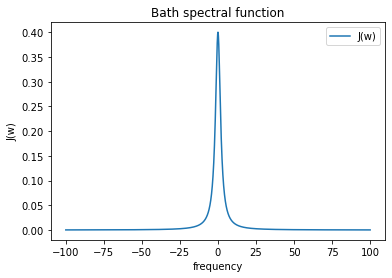

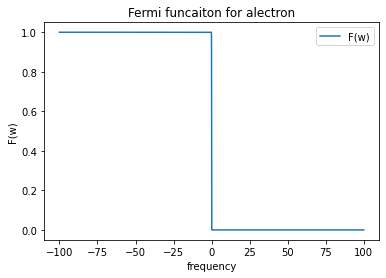

spectral_pole 
 (2+0j)
spectral_eta 
 (0.9232695124919383+0.2510375454853122j)


In [11]:
# the information of fermi funcaiton
T = 0.02                 #eV
chemical_potential = 0.0 #ev

fermi = np.zeros(omega_sample)
for i in range(omega_sample):
    if ((omega[i] - chemical_potential) / (T)) <= 50 :
        fermi[i] = 1.0 / ( 1.0 + np.exp( (omega[i] - chemical_potential) / (T) ) )
    elif ((omega[i] - chemical_potential) / (T)) > 50 :
        fermi[i] = 1.0 / 10e+22

# the information of bath spectral funcation
# the Lorentz type J(w) = 0.5 * sys_bath_coupling * band_width**2 / ( (w - band_center)**2 + band_width**2)
sys_bath_coupling = 0.4  #eV, is equal to HEOM-QUICK
band_width = 2.0         #eV
band_center = 0.0        #eV
bath_spectral = np.zeros(omega_sample, dtype=complex)
bath_spectral = (sys_bath_coupling * (band_width**2)) / ((omega + band_center)**2 + band_width**2)
spectral_diss_rate = (band_width - 1.j * band_center) / hbar
spectral_eta = sys_bath_coupling * band_width \
                / ( 1.0 + np.exp((1.j * spectral_diss_rate - chemical_potential) * hbar / T )) / hbar**2

plt.title("Bath spectral function") 
plt.xlabel("frequency") 
plt.ylabel("J(w)") 
plt.plot(omega, bath_spectral.real, label = 'J(w)')
plt.legend(loc=1)
plt.show()

plt.title("Fermi funcaiton for alectron") 
plt.xlabel("frequency") 
plt.ylabel("F(w)") 
plt.plot(omega, fermi.real, label = 'F(w)')
plt.legend(loc=1)
plt.show()

print('spectral_pole \n', spectral_diss_rate * hbar)
print('spectral_eta \n', spectral_eta)


#the Matsubara scheme
#num_mats = 1001
#mats = np.linspace(-(num_mats - 1)/2, (num_mats - 1)/2, num_mats, dtype = np.complex128)
#fermi_mats = np.zeros(omega_sample, dtype = np.complex128)
#bath_corr_msd = np.zeros(time_sample, dtype=np.complex128)

# for i in range(num_mats):
#     mats[i] = (mats[i] * 2 + 1) * np.pi * complex(0,1.0)

# for i in range(omega_sample):
#     fermi_mats[i] = 0.5
#     for j in range(num_mats):
#        fermi_mats[i] = fermi_mats[i] + 1.0 / (mats[j] - omega[i]/T)

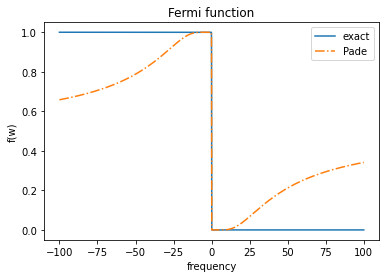

In [12]:
#the Pade scheme
num_pade = 20
b = np.zeros(2 * num_pade)
mat_xi = np.zeros((2 * num_pade, 2 * num_pade))
mat_varsigma = np.zeros((2 * num_pade - 1, 2 * num_pade - 1))
tilde_eta = np.zeros(num_pade, dtype = complex)         # namely cpcoef in evaluatepara.f90 
pole = np.zeros(num_pade, dtype = complex)              # namely cppole in evaluatepara.f90
eta = np.zeros(num_pade, dtype = complex)               # namely cb in evaluatepara.f90
diss_rate = np.zeros(num_pade, dtype = complex)         # namely cgamma in evaluatepara.f90


for i in range(2 * num_pade):
    b[i] = 2 * (i) + 1

for i in range(2 * num_pade):
    for j in range(2 * num_pade):
        if (i == j-1 or i == j+1) :
            mat_xi[i,j] = 1.0 / np.sqrt(b[i] * b[j])

eigval_xi, eigvec_xi = np.linalg.eig(mat_xi) 
eigval_xi = np.sort(eigval_xi)
            
for i in range(2 * num_pade -1):
    for j in range(2 * num_pade -1):
        if (i == j-1 or i == j+1) :
            mat_varsigma[i,j] = 1.0 / np.sqrt(b[i+1] * b[j+1])

eigval_varsigma, eigvec_varsigma = np.linalg.eig(mat_varsigma)
eigval_varsigma = np.sort(eigval_varsigma)


for i in range(num_pade):
    pole[i] = (0. +2.j) / abs(eigval_xi[i])
    eigval_xi[i] = 4.0 / eigval_xi[i]**2
for i in range(num_pade-1):
    eigval_varsigma[i] = 4.0 / eigval_varsigma[i]**2

for i in range(num_pade):
    tilde_eta[i] = 0.5 * num_pade * (2 * num_pade + 1)
    for j in range(i):
        tilde_eta[i] = tilde_eta[i] * (eigval_varsigma[j] - eigval_xi[i]) / (eigval_xi[j] - eigval_xi[i])
    for j in range(i+1,num_pade):
        tilde_eta[i] = tilde_eta[i] * (eigval_varsigma[j-1] - eigval_xi[i]) / (eigval_xi[j] - eigval_xi[i])
    tilde_eta[i] = (-1. +0.j) * tilde_eta[i]

fermi_pade = np.zeros(omega_sample, dtype = np.complex128)
for i in range(omega_sample):
    fermi_pade[i] = 0.5
    for j in range(num_pade):
        fermi_pade[i] = fermi_pade[i] + tilde_eta[j] / (omega[i] / T + pole[j]) \
                                      + tilde_eta[j] / (omega[i] / T - pole[j])

        
plt.title("Fermi function") 
plt.xlabel("frequency") 
plt.ylabel("f(w)") 
plt.plot(omega, fermi, label = 'exact')
#plt.plot(omega, fermi_mats.real, label = 'Matsubara', linestyle = '--')
plt.plot(omega, fermi_pade.real, label = 'Pade', linestyle = '-.')
plt.legend(loc=1)
plt.show()

In [13]:
# Here we test the nalf = 1, spin = ↑, norbs = 1 and nsgn = (+ or 1). 
# the coefficients eta and gamma only sum over the number of poles.

for i in range(num_pade):
    diss_rate[i] = -1.j * T * pole[i] / hbar
    eta[i] = 2.j * tilde_eta[i] * sys_bath_coupling * 0.5 * band_width**2 * T \
             / ( (pole[i] * T - band_center)**2 + band_width**2 ) / hbar**2

spectral_diss_rate = (band_width - 1.j * band_center) / hbar
spectral_eta = 0.5 * sys_bath_coupling * band_width \
                   * fermi_by_pade((1.j * spectral_diss_rate - chemical_potential) * hbar) / hbar**2


print('spectral_diss_rate: ', -1 * spectral_diss_rate * hbar)
print('spectral_eta ', spectral_eta)

print('pade_diss_rate \n', -1 * diss_rate * hbar)
print('pade_eta \n', eta)


spectral_diss_rate:  (-2+0j)
spectral_eta  (0.46163475624596917-1.7107075774668585j)
pade_diss_rate 
 [ -0.06283185+0.j  -0.18849556+0.j  -0.31415927+0.j  -0.43982297+0.j
  -0.56548668+0.j  -0.69115038+0.j  -0.81681409+0.j  -0.9424778 +0.j
  -1.0681415 +0.j  -1.19380535+0.j  -1.31949279+0.j  -1.44619637+0.j
  -1.58443278+0.j  -1.76495399+0.j  -2.02608389+0.j  -2.42072165+0.j
  -3.05905273+0.j  -4.22944946+0.j  -6.99190012+0.j -20.89157037+0.j]
pade_eta 
 [0.-0.01848363j 0.-0.01863088j 0.-0.01893253j 0.-0.01940378j
 0.-0.02006985j 0.-0.02096963j 0.-0.02216192j 0.-0.02373645j
 0.-0.02583409j 0.-0.0286862j  0.-0.03272508j 0.-0.03973257j
 0.-0.06039882j 0.-0.14225723j 0.+1.77002799j 0.+0.15481247j
 0.+0.0909147j  0.+0.0697597j  0.+0.06048296j 0.+0.05673243j]


In [14]:
# compare the pade results and the exact correlation function in time domain
# exact results
for i in range(time_sample_for_corr):
    #bath_corr_exact[i] = gauss_Legendre_integral(fdt, down_limit = -20, upper_limit = 20, interval = 100, t=tt_for_corr[i])
    bath_corr_exact_real[i],err = integrate.quad(fdt_real, a = -100, b = 100, args=(tt_for_corr[i]), limit = 20000)
    bath_corr_exact_imag[i],err = integrate.quad(fdt_imag, a = -200, b = 200, args=(tt_for_corr[i]), limit = 10000)
    bath_corr_exact[i] = complex(bath_corr_exact_real[i], bath_corr_exact_imag[i])
    #print(bath_corr_exact[i])

print('Done!')

<ipython-input-14-9f1009cb0324>:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  bath_corr_exact_real[i],err = integrate.quad(fdt_real, a = -100, b = 100, args=(tt_for_corr[i]), limit = 20000)


Done!


In [15]:
# pade results
for i in range(time_sample_for_corr):
    for j in range(num_pade):
        bath_corr_psd[i] = bath_corr_psd[i] + eta[j] * np.exp(-1 * diss_rate[j] * hbar * tt_for_corr[i])
    bath_corr_psd[i] = bath_corr_psd[i] + spectral_eta * np.exp(-1 * spectral_diss_rate * hbar * tt_for_corr[i])

print('Done!')

Done!


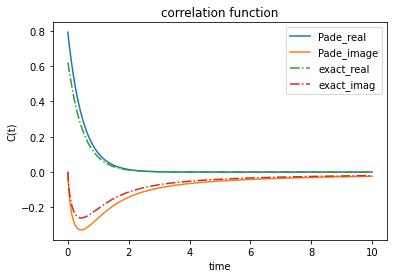

In [16]:
plt.title("correlation function") 
plt.xlabel("time") 
plt.ylabel("C(t)") 
plt.plot(tt_for_corr, bath_corr_psd.real, label = 'Pade_real') 
plt.plot(tt_for_corr, bath_corr_psd.imag, label = 'Pade_image') 
plt.plot(tt_for_corr, bath_corr_exact_real, label = 'exact_real', linestyle = '-.') 
plt.plot(tt_for_corr, bath_corr_exact_imag, label = 'exact_imag', linestyle = '-.') 
plt.legend(loc=1) 
plt.show()

In [33]:
'''bath_corr_1_freq = np.fft.fft(bath_corr_psd)
freq_1 = np.fft.fftfreq( time_sample_for_corr, (tt_for_corr_max - tt_for_corr_min) /time_sample_for_corr )
eng_1 = len(tt_for_corr)

fourier_psd = np.zeros(time_sample_for_corr)
bath_corr_psd_freq_fourier = np.zeros(time_sample_for_corr, dtype=complex)
mark = int ((time_sample_for_corr-1) / 2)

fourier_psd[:mark] = freq_1[mark+1:]
fourier_psd[mark:] = freq_1[:mark+1]

bath_corr_psd_freq_fourier[:mark] = bath_corr_1_freq[mark+1:]
bath_corr_psd_freq_fourier[mark:] = bath_corr_1_freq[:mark+1]


bath_corr_2_freq = np.fft.fft(bath_corr_exact)
freq_2 = np.fft.fftfreq( time_sample_for_corr, (tt_for_corr_max - tt_for_corr_min) /time_sample_for_corr )
leng_exact = len(tt)

fourier_exact = np.zeros(time_sample_for_corr)
bath_corr_exact_freq_fourier = np.zeros(time_sample_for_corr, dtype=complex)

fourier_exact[:mark] = freq_2[mark+1:]
fourier_exact[mark:] = freq_2[: mark+1]

bath_corr_exact_freq_fourier[:mark] = bath_corr_2_freq[mark+1:]
bath_corr_exact_freq_fourier[mark:] = bath_corr_2_freq[:mark+1]'''

omega_max_freq = 100.0
omega_min_freq = -100.0
omega_sample_freq = 2000 + 1
omega_freq = np.linspace(omega_min_freq, omega_max_freq, omega_sample_freq)


bath_corr_psd_freq = np.zeros(omega_sample_freq, dtype = complex)
bath_corr_exact_freq = np.zeros(omega_sample_freq, dtype = complex)

for i in range(omega_sample_freq):
    bath_corr_psd_freq[i] = complex(Jfermi_psd_real(omega_freq[i]), Jfermi_psd_imag(omega_freq[i]))
    bath_corr_exact_freq[i] = complex(Jfermi_exact_real(omega_freq[i]), Jfermi_exact_imag(omega_freq[i]))

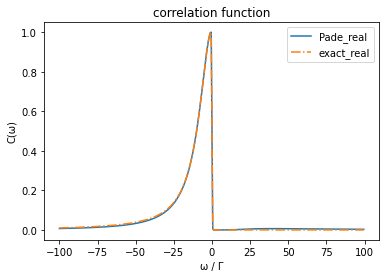

In [37]:
plt.title("correlation function") 
plt.xlabel("ω / Γ") 
plt.ylabel("C(ω)")
plt.plot(omega_freq[800:1200]/(sys_bath_coupling/2), bath_corr_psd_freq[800:1200].real/max(bath_corr_psd_freq.real) , label = 'Pade_real')
plt.plot(omega_freq[800:1200]/(sys_bath_coupling/2), bath_corr_exact_freq[800:1200].real/max(bath_corr_exact_freq.real) , label = 'exact_real', linestyle = '-.')
#plt.plot(fourier_psd/(sys_bath_coupling/2), bath_corr_psd_freq_fourier.real/max(bath_corr_psd_freq_fourier.real) , label = 'Pade_real_Fourier')
#plt.plot(fourier_exact/(sys_bath_coupling/2), bath_corr_exact_freq_fourier.real/max(bath_corr_exact_freq_fourier.real) , label = 'exact_real_Fourier', linestyle = '--')
plt.legend(loc=1)
plt.show()